# Antenna and Array Demo

In this demo, we illustrate how to use build and simulate antenna elements and arrays.  In going through this demo, you will learn to:

* Construct antenna elements
* Plot the antenna element gain patterns
* Construct URA from the elements
* Get beamforming vectors for the URA
* Plot the array pattern for a given beamforming vector

## Loading the Packages

We first load some standard packages


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

To access the packages, you need to add the packages to your path and then import the relevant methods

In [11]:
path = os.path.abspath('..')
if not path in sys.path:
    sys.path.append(path)

from sim.antenna import Elem3GPP
from sim.array import URA, RotatedArray
import sim.antenna

If you modify the packages, you will need to re-import them.

In [12]:
import imp
imp.reload(sim.antenna)
imp.reload(sim.array)

<module 'sim.array' from 'C:\\Users\\sdran\\Google Drive (sr663@nyu.edu)\\RanganGroup\\Simulations\\mmwchanmod-nyu\\sim\\array.py'>

## Creating and Plotting an Antenna Element

We create an antenna element based on the 3GPP model.  The parameter specify the half-power beamwidths in the azimuth and elevation direction.

In [17]:
elem = sim.antenna.Elem3GPP(theta0=0.1,thetabw=60, phibw=80)

To plot the directivity of the element

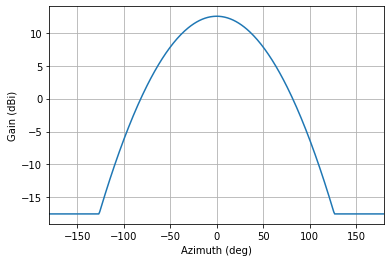

In [18]:
elem.plot_pattern(nphi=360, plot_type='rect_phi')
plt.ylabel('Gain (dBi)')
plt.grid()

Or, we can do a polar plot.  In this case, we plot a few different elevation cut angles, `theta`. 

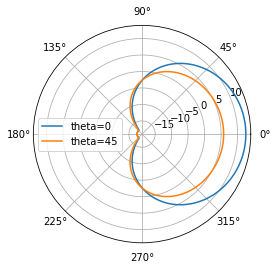

In [19]:
theta = np.array([0,45])
elem.plot_pattern(nphi=360, theta=theta, plot_type='polar_phi')
leg_str = []
for t in theta:
    leg_str.append( 'theta=%d' % t)
plt.legend(leg_str, loc='center left')


Finally, we can also plot the 3D pattern.

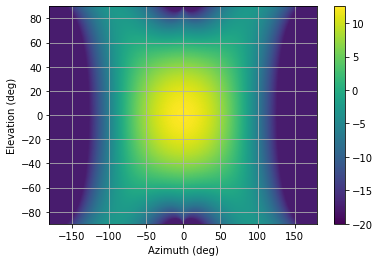

In [20]:
phi, theta, v, ax, im =\
   elem.plot_pattern(nphi=360, ntheta = 180,\
                    plot_type='2d', vmin=-20)
plt.grid()
plt.colorbar(im)

We can also construct antenna elements oriented in different directions.  In this case, we build an antenna pattern oriented off center with much smaller beamwidths.  We can see from the pattern that the peak directivity is higher and located at the desired location.

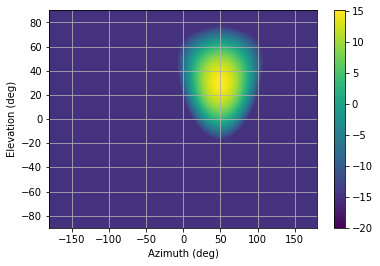

In [48]:
elem = sim.antenna.Elem3GPP(theta0=30, phi0=50,thetabw=30, phibw=30)
phi, theta, v, ax, im =\
   elem.plot_pattern(nphi=360, ntheta = 180,\
                    plot_type='2d', vmin=-20)
plt.grid()
plt.colorbar(im)

## Creating an Array 

We can create an uniform rectangular array as follows.  The URA has its elements on the y-z plane so that the direction of maximum gain is in the x-axis.

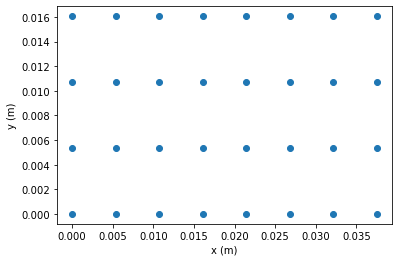

In [4]:
# Antenna element
elem = sim.antenna.Elem3GPP(thetabw=90, phibw=80)

# Number of antenna elements in the y and z direction respectively
nant = np.array([8,4])

fc=28e9 # carrier frequency for narrowband response

# Array
arr = URA(elem=elem, nant=nant, fc=fc)

# Plot the antenna positions in the y and z plane
plt.plot(arr.elem_pos[:,1], arr.elem_pos[:,2], 'o')
plt.xlabel('x (m)')
_ = plt.ylabel('y (m)')

We can easily get beamforming vectors for specific directions and plot the array pattern for the given beamforming vector.  The following code plots the array pattern with three different directions.  The intended direction is shown in the red dot.  

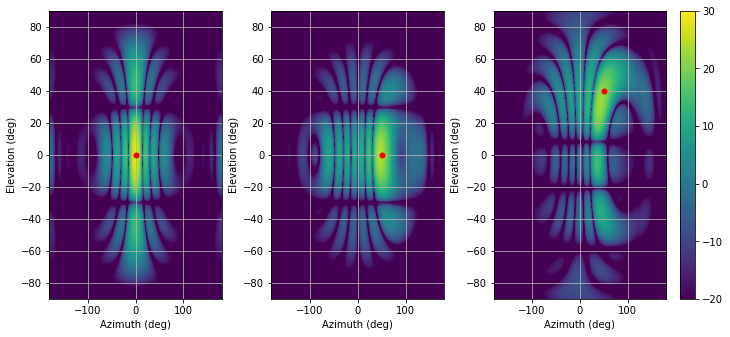

In [5]:
theta0 = [0, 0, 40]
phi0 = [0, 50, 50]
nplot = len(theta0)

fig, ax = plt.subplots(1,nplot, figsize=(10,5))
for i in range(nplot):
    
    # Get the beamform vector
    w = arr.conj_bf(phi0[i], theta0[i])
    
    # Get the antenna pattern
    phi, theta, v, axi, im =\
       arr.plot_pattern(w=w,nphi=360, ntheta = 180,\
                    plot_type='2d', vmin=-20, vmax=30, ax=ax[i])
    axi.grid()
    axi.plot(phi0[i], theta0[i], 'ro', ms=5)

plt.tight_layout()
fig.subplots_adjust(bottom=0.1, right=0.93, top=0.9)
cax = plt.axes([0.95, 0.1, 0.02, 0.8])
_ = fig.colorbar(im, cax=cax)   

## Rotating an Array

The array above is constructed to have maximum gain in the x direction.  We can rotate the array using the `RotatedArray` class.  We simply first create the array aligned in the x direction and then pass that to the class along with the desired orientation.  The following code constructs an array oriented in a direction `theta0, phi0` and plots the array pattern.

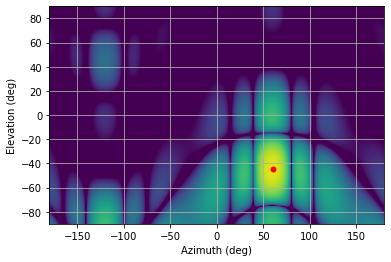

In [9]:
# Desired angle of maximum gain
phi0 = 60
theta0 = -45

# Create the rotated array
arr_rot = RotatedArray(arr,phi0=phi0,theta0=theta0)

# Get BF vector in direction of maximum gain
w = arr_rot.conj_bf(phi0, theta0)

# Get the antenna pattern
phi, theta, v, axi, im =\
   arr_rot.plot_pattern(w=w,nphi=360, ntheta = 180,\
                plot_type='2d', vmin=-20, vmax=30)
axi.grid()
axi.plot(phi0, theta0, 'ro', ms=5)

